In [2]:
import pandas as pd

music_data = pd.read_csv('music classification.csv')

music_data

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


## When we train a model we split the data into two seperate data sets

input set and output set

In [3]:
X = music_data.drop(columns=['genre'])   # the dataframe object has method called drop

# created X to store input set
# put cursor on method name and hit shift and tab to see the paramters we can pass in

In [4]:
X

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1
5,30,1
6,31,1
7,33,1
8,37,1
9,20,0


In [5]:
Y = music_data['genre']

In [6]:
Y

0        HipHop
1        HipHop
2        HipHop
3          Jazz
4          Jazz
5          Jazz
6     Classical
7     Classical
8     Classical
9         Dance
10        Dance
11        Dance
12     Acoustic
13     Acoustic
14     Acoustic
15    Classical
16    Classical
17    Classical
Name: genre, dtype: object

## Build a algorithm - We will use decesion tree

skikit learn library
module called tree
in module the class in called DecisionTreeClassifier

then create new instance of this class

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
model = DecisionTreeClassifier()

# method (fit) takes two data sets. input and output
model.fit(X,Y)
# for above to avoid error below we need (X.values,Y), train the model with values of input_dataset

# method predict takes 2d array
# store in variable called predictions
predictions = model.predict([[21,1], [22,0]])
predictions

C:\Users\D8ISU4A\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['HipHop', 'Dance'], dtype=object)

### Measure Accuracy of Model

### train, test 

allocate 70-80% for training and 20- 30 percent for testing

compare predictions to actual values in test set

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# allocating 20% of data for testing
# function returns a tuple

train_test_split(X,Y,test_size = 0.2)

[    age  gender
 1    23       1
 6    31       1
 5    30       1
 15   31       0
 14   30       0
 0    20       1
 3    26       1
 13   27       0
 17   35       0
 12   26       0
 10   21       0
 2    25       1
 8    37       1
 4    29       1,
     age  gender
 11   25       0
 7    33       1
 9    20       0
 16   34       0,
 1        HipHop
 6     Classical
 5          Jazz
 15    Classical
 14     Acoustic
 0        HipHop
 3          Jazz
 13     Acoustic
 17    Classical
 12     Acoustic
 10        Dance
 2        HipHop
 8     Classical
 4          Jazz
 Name: genre, dtype: object,
 11        Dance
 7     Classical
 9         Dance
 16    Classical
 Name: genre, dtype: object]

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
# tuple unpacking into 4 variables
# first two varialbes are input sets for training and testing
# second two are output set for training and testing

X_train , X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

# pass in training data set 
# input values for testing data set in model.predict

model.fit(X_train,Y_train)
predictions = model.predict(X_test)

# give it two arguements, expected values, then actual values
score = accuracy_score(Y_test, predictions)
score

1.0

## 100 percent

#### This runs the above test one time with a random data from data set, click rerun the do it again

#### We want a better way to run it multple times

click the current cell then hit control and enter to run it and not go to next cell below

test_size = 0.2 if this above was changed to 80% then the accuracy drops a lot

 .4444 percent accuracy
 
 more complex the model then the more data we need

# Model Precistance

#### some models may take a long time to train, we can build model and save to a file. 

In [13]:
# externals module  , joblib object has methods for saving and loading models
from sklearn.externals import joblib

ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\Users\D8ISU4A\AppData\Local\anaconda3\lib\site-packages\sklearn\externals\__init__.py)

### joblib is now a seperate py package

import it as joblib rather than from sklearn.externals

In [14]:
import joblib

In [15]:
# call joblib after model is built and trained
# 2 arguements, the model and name of file that we want to store model

joblib.dump(model, 'music-recommender.joblib')



['music-recommender.joblib']

In [16]:
# model above is now stored and can be found in jupyter notebook saved locations

### To return trained model

In [17]:
model = joblib.load('music-recommender.joblib')

# then can make predictions
predictions = model.predict([[21,1]])

C:\Users\D8ISU4A\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [18]:
1+1

2

### Decesion Tree Summary


 import pandas as pd  -  import packages
 from sklearn.tree import DecesionTreeClassifier  -import sklearn
 
 music_data = pd.read_csv('filename.csv')  pandas dataset as variable
 
 X = music_data.drop(columns=['genre'])  - create input set
 Y = music_data['genre']  - create output set
 
 model = DecesionTreeClassifier()  - create model
 model.fit(X,Y)  - train it

from sklearn import tree

In [20]:
# a few arguements for this (model, name of output file, feature names, class names, label, rounded, filled)
# .dot is a graph description language
# feature names is array of 2 strings, age and gender
# class names is unique classes from Y data set above.. also has sorted function to sort alabetically, pass in result of Y.unique() 

tree.export_graphviz(model, out_file = 'music=recommender.dot',
                    feature_names =['age','gender'] ,
                    class_names=sorted(Y.unique()),
                    label='all',
                    rounded=True,
                    filled=True)

In [21]:
## you will have to open the file it created and drop it into a VScode (Visual Studio Code) window

# download the extension dot in there

# it will show the decesion Tree Breakdown

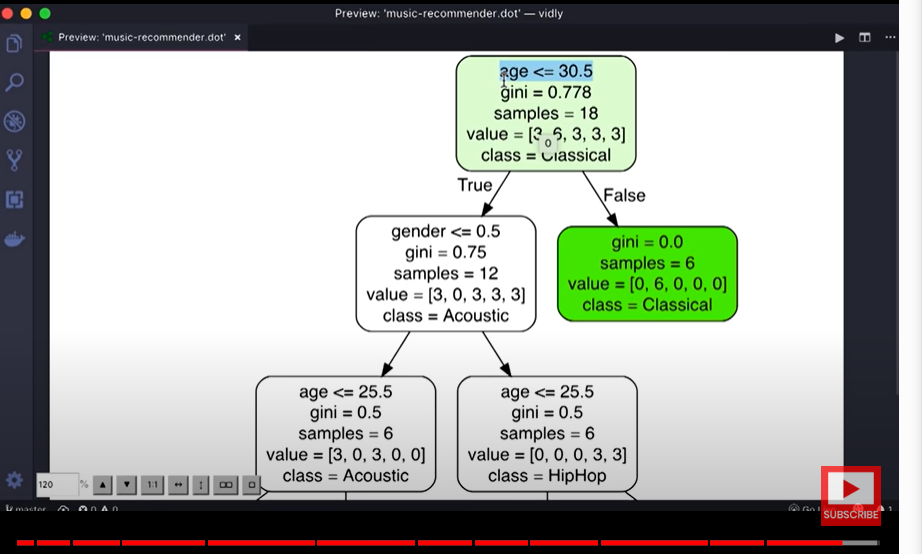